In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection and Pre-Processing

In [ ]:
tdata=pd.read_csv('/content/Titanic-Dataset.csv')

In [ ]:
tdata.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#total number of rows and column in the dataset
tdata.shape

(891, 12)

In [ ]:
tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# total number of mising values
tdata.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Handling the Missing Values

In [ ]:
# dropping cabin column because most of its values are missing
tdata=tdata.drop(columns='Cabin',axis=1,errors='ignore')

In [ ]:
# replacing the missing values in the "Age " column with mean value
tdata['Age'].fillna(tdata['Age'].mean())

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [ ]:
tdata.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#We can't find mean for embarked column because it is in text format. So, we will find mode of the embarked column. Mode means the value which is repeated most number of time. So, we will fill the missing values with the values which are repeated most number of times.
print(tdata['Embarked'].mode()[0])

S


In [ ]:
#replacing the values
tdata['Embarked'].fillna(tdata['Embarked'].mode()[0])

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [ ]:
tdata.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Data Analysis

In [ ]:
tdata.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#finding people who survived and not survived
# 0 represents who survived
# 1 represents who didn't survived
tdata['Survived'].value_counts()

,count
Survived,
0,549
1,342


Data Visualization

Text(0.5, 1.0, 'Survived or Not - Survived Count')

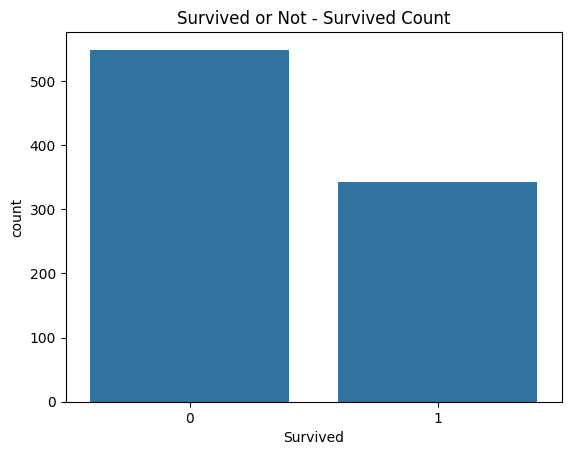

In [ ]:
sns.countplot(x='Survived',data=tdata)
plt.title("Survived or Not - Survived Count")

In [ ]:
tdata['Sex'].value_counts()

,count
Sex,
male,577
female,314


Text(0.5, 1.0, 'Gender Distribution')

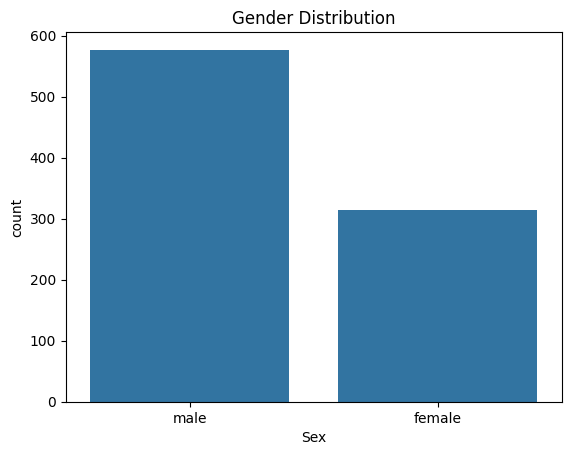

In [ ]:
sns.countplot(x='Sex',data=tdata)
plt.title("Gender Distribution")

Text(0.5, 1.0, 'Gender-wise Survival Count')

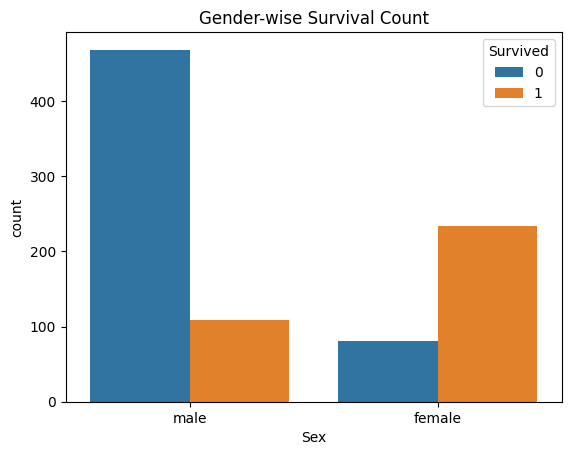

In [ ]:
sns.countplot(x='Sex',hue='Survived',data=tdata)
plt.title("Gender-wise Survival Count")

Text(0.5, 1.0, 'Passenger Count By Class')

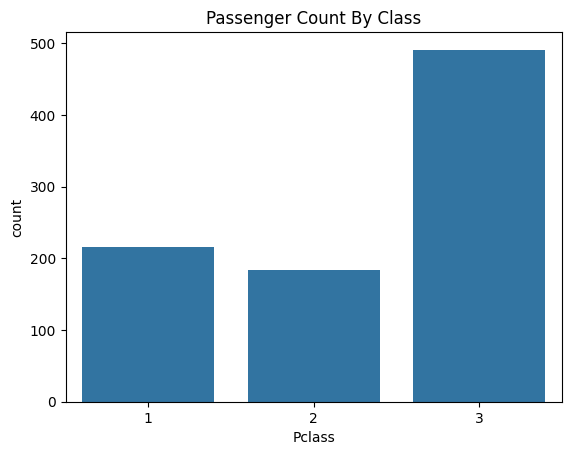

In [ ]:
sns.countplot(x='Pclass',data=tdata)
plt.title("Passenger Count By Class")

Text(0.5, 1.0, 'Survival Count by Passenger Class')

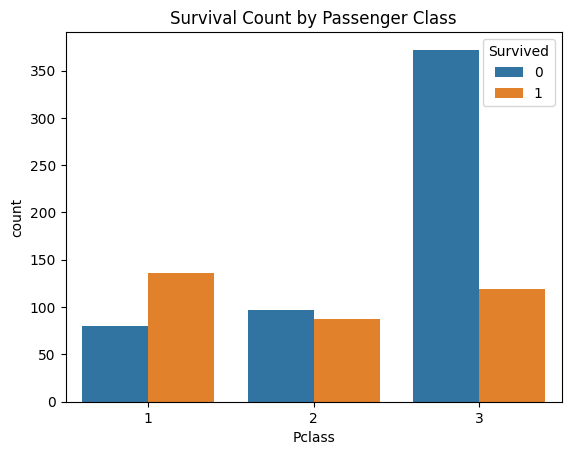

In [ ]:
sns.countplot(x='Pclass',hue='Survived',data=tdata)
plt.title("Survival Count by Passenger Class")

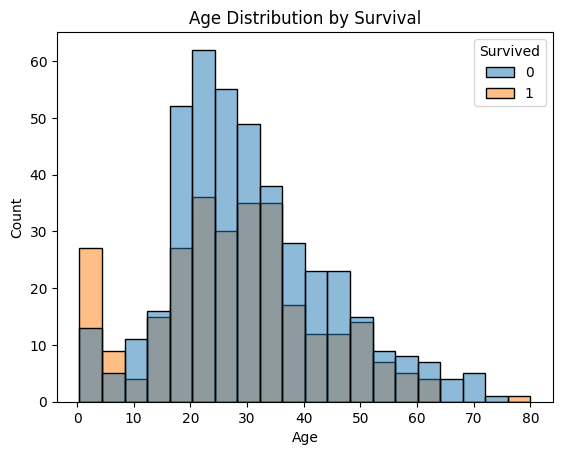

In [ ]:
sns.histplot(data=tdata, x='Age', hue='Survived')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


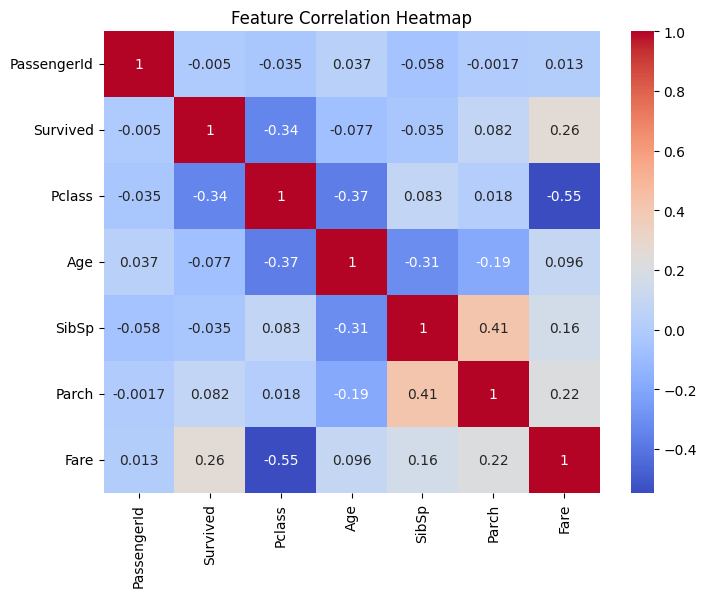

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(tdata.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


Encoding the Categorical Column

In [ ]:

tdata['Sex'].value_counts()


,count
Sex,
male,577
female,314


In [ ]:
tdata['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [ ]:
# Converting categorical columns
# changing the sex column. replacing male with 0 and female 1
# changing the embarked column. replacing 'S' with 0, 'C' with 1 and 'Q' with 2
tdata = tdata.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}})

Separating Features and Target

In [ ]:
x=tdata.drop(columns=['PassengerId', 'Name', 'Ticket','Survived'],axis=1)
y=tdata['Survived']

In [ ]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Split the data into Traning and Testing Data

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x.shape,xtrain.shape,xtest.shape)

(891, 7) (712, 7) (179, 7)


Model Training - Logistic Regression Model

In [ ]:
model = LogisticRegression()

In [ ]:
#Training the Logistic Regression model with training data
# Impute missing values in xtrain before training
# Fill missing 'Age' values with the mean of 'Age' in the training data
xtrain['Age'] = xtrain['Age'].fillna(xtrain['Age'].mean())
# Fill missing 'Embarked' values with the mode of 'Embarked' in the training data
xtrain['Embarked'] = xtrain['Embarked'].fillna(xtrain['Embarked'].mode()[0])
model.fit(xtrain,ytrain)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation - Accuracy Score

In [ ]:
#Accuracy on Training Data
xtrain_prediction=model.predict(xtrain)

In [ ]:
print(xtrain_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [ ]:
training_data_accuracy = accuracy_score(ytrain,xtrain_prediction)
print ("Accuracy Score of Training Data :" , training_data_accuracy)

Accuracy Score of Training Data : 0.8089887640449438


In [ ]:
#Accuracy on Test Data

# Impute missing values in xtest before testing
# Fill missing 'Age' values with the mean of 'Age' in the testing data
xtest['Age'] = xtest['Age'].fillna(xtest['Age'].mean())
# Fill missing 'Embarked' values with the mode of 'Embarked' in the testing data
xtest['Embarked'] = xtest['Embarked'].fillna(xtest['Embarked'].mode()[0])
xtest_prediction=model.predict(xtest)

In [ ]:
print(xtest_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [ ]:
testing_data_accuracy = accuracy_score(ytest,xtest_prediction)
print ("Accuracy Score of Testing Data :" , testing_data_accuracy)

Accuracy Score of Testing Data : 0.7821229050279329
